<h1> <center> SCOTLAND'S FOOTBALL ANALYSIS FROM 1872 TO 2022  


___

**Link to Dataset** - https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017


<h4> INSTALLING LIBRARIES

In [ ]:
# Installing both "opendatasets" as well as "pandas"
!pip install opendatasets pandas --upgrade --quiet

<h4> IMPORTING LIBRARIES

In [1]:
import opendatasets as od

# os module provides functions for interacting with the operating system 
import os

import pandas as pd
import numpy as np

# Visualization Libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# NOTE - if '%matplotlib inline' is not used sometimes plots may show up in pop-up windows

In [2]:
# Downloading the file
od.download('https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017')

Skipping, found downloaded files in ".\international-football-results-from-1872-to-2017" (use force=True to force download)


In [3]:
# Checking the downloaded files
os.listdir('international-football-results-from-1872-to-2017')

['results.csv', 'shootouts.csv']

In [4]:
# Now lets read the data using `pandas` and also create a variable name for the dataframe 
football_df = pd.read_csv('results.csv')
football_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43752 entries, 0 to 43751
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        43752 non-null  object
 1   home_team   43752 non-null  object
 2   away_team   43752 non-null  object
 3   home_score  43752 non-null  int64 
 4   away_score  43752 non-null  int64 
 5   tournament  43752 non-null  object
 6   city        43752 non-null  object
 7   country     43752 non-null  object
 8   neutral     43752 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [5]:
# Checking for Null values in the df
football_df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

**We can proceed further as there are `no null values` in the dataset**

**Lets create a new column called `home_team_result` with 3 outputs to the game i.e., `Win, Draw or Loss`  
And similarly create `away_team_result` as well**

In [6]:
football_df.loc[football_df['home_score'] > football_df['away_score'], 'home_team_result'] = 'Win'
football_df.loc[football_df['home_score'] < football_df['away_score'], 'home_team_result'] = 'Loss'
football_df.loc[football_df['home_score'] == football_df['away_score'], 'home_team_result'] = 'Draw'

football_df.loc[football_df['away_score'] > football_df['home_score'], 'away_team_result'] = 'Win'
football_df.loc[football_df['away_score'] < football_df['home_score'], 'away_team_result'] = 'Loss'
football_df.loc[football_df['away_score'] == football_df['home_score'], 'away_team_result'] = 'Draw'

football_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'home_team_result',
       'away_team_result'],
      dtype='object')

___

### OBJECTIVES

   
For our analysis I'll be choosing a specific country (i.e.,`Scotland` in my case) and try to answer some intresting questions realted to it 

**Questions** - 

* 1. Scotland's Overall Performance in all Tournaments (i.e., Win, Draw and Loss)
* 2. Scotland's Top 5 Tournaments
* 3. Average goals scored by Scotland in 
  * a. Neutral Venue
  * b. Home Venue
  * c. Away Venue
* 4. Scotland's perfomance in top 15 countries by
  * 1a. Win Count
  * 1b. Win Ratio
  * 2a. Draw Count
  * 2b. Draw Ratio
  * 3a. Loss Count
  * 3b. Loss Ratio
*  * 5a. Best scoring cities for Scotland  
   * 5b. Worst scoring cities for Scotland 

___

#### DATA ON SCOTLAND

Here we only look at `Scotland's` data from all the countries and name the dataframe as `scotland_df` 

In [7]:
# Creating a df called "scotland_home" to select only 'Scotland' in the 'home_team' column
scotland_home = football_df[football_df.home_team == 'Scotland']
scotland_home

# Similarly creating a df called "scotland_away"
scotland_away = football_df[football_df.away_team == 'Scotland']
scotland_away

# Merging both "scotland_home" & "scotland_away" into a single df called "scotland_df"
scotland_df = scotland_home.merge(scotland_away, how='outer')

# Viewing the df
scotland_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              810 non-null    object
 1   home_team         810 non-null    object
 2   away_team         810 non-null    object
 3   home_score        810 non-null    int64 
 4   away_score        810 non-null    int64 
 5   tournament        810 non-null    object
 6   city              810 non-null    object
 7   country           810 non-null    object
 8   neutral           810 non-null    bool  
 9   home_team_result  810 non-null    object
 10  away_team_result  810 non-null    object
dtypes: bool(1), int64(2), object(8)
memory usage: 70.4+ KB


In [8]:
len(scotland_df)

810

Now, let's create a new column called `team result` where Scotland's match result is displayed irrespective of home or away games

In [9]:
scotland_df.loc[scotland_df['home_team'] == 'Scotland', 'team_result'] = scotland_df['home_team_result']
scotland_df.loc[scotland_df['away_team'] == 'Scotland', 'team_result'] = scotland_df['away_team_result']

scotland_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_team_result,away_team_result,team_result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,Draw,Draw
1,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Win,Loss,Win
2,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Win,Loss,Win
3,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Win,Loss,Win
4,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,Win,Loss,Win
...,...,...,...,...,...,...,...,...,...,...,...,...
805,2021-10-12,Faroe Islands,Scotland,0,1,FIFA World Cup qualification,Tórshavn,Faroe Islands,False,Loss,Win,Win
806,2021-11-12,Moldova,Scotland,0,2,FIFA World Cup qualification,Chișinău,Moldova,False,Loss,Win,Win
807,2022-03-29,Austria,Scotland,2,2,Friendly,Vienna,Austria,False,Draw,Draw,Draw
808,2022-06-11,Republic of Ireland,Scotland,3,0,UEFA Nations League,Dublin,Republic of Ireland,False,Win,Loss,Loss


___

<h3> 1. Scotland's Overall Performance in all Tournaments (i.e., Win, Draw and Loss)

Let's see Scotland's results in terms of `%` by plotting a `pie chart`

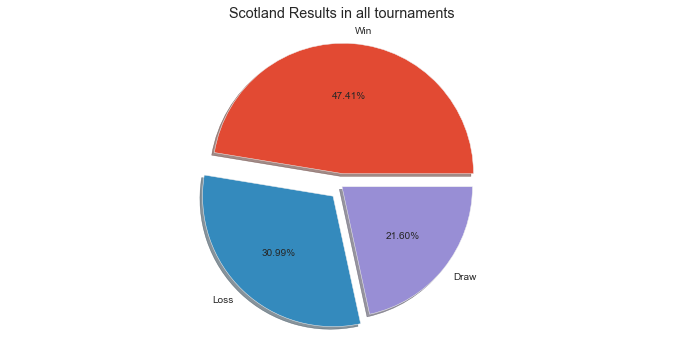

In [41]:
# results_counts gives the count of matches won, drawn and lost by Scotland
results_counts = scotland_df.team_result.value_counts()

# Plotting Pie Chart in % 
plt.figure(figsize=(12,6))
plt.title('Scotland Results in all tournaments')

explode = (0.1, 0.1, 0)
plt.style.use('ggplot')
plt.axis('equal')
plt.pie(results_counts, labels=results_counts.index, autopct='%1.2f%%',
        explode=explode, startangle=0, shadow=True);

**INSIGHTS** - In a total of `810 matches` played by Scotland until 14-June-2022, Scotland has the following results  

>Win percentage of around **`47%`**  
Draw percentage of around **`31%`**  
Loss Percentage of around **`21%`**

From the above data we can infer that Scotland wins around `half` of it's matches played overall 

___

<h3> 2. Scotland's Top 5 Tournaments

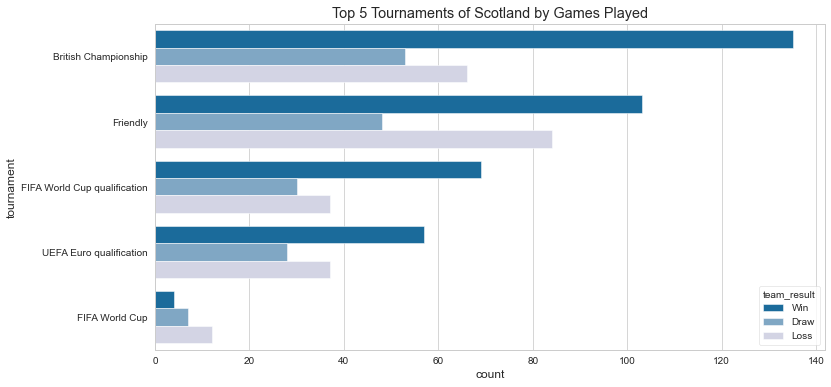

In [11]:
# setting the gird style
sns.set_style('whitegrid')

# plotting the graph
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title('Top 5 Tournaments of Scotland by Games Played')

sns.countplot(y='tournament', hue='team_result', 
              order=['British Championship', 'Friendly', 'FIFA World Cup qualification', 'UEFA Euro qualification', 'FIFA World Cup'], 
              hue_order=['Win','Draw','Loss'],
              palette='PuBu_r',
              data=scotland_df);

**INSIGHTS** -

From the above graph we can infer that the "`British Championship`" is the most played Tournament by Scotland. We can also see that they've won most of their matches and have lost few in this competition which indicates a good performance on their part in this competition .

On the other hand, we see that Scotland’s 5th most played tournament is the "FIFA World Cup". By looking at the graph we can say that their perfomance is poor in this tournament as they’ve lost more matches than they’ve won.     

<h5> Finidng the years that Scotland has qualified for FIFA World Cup 

In [12]:
# Changing the datatype of date from "object" to "datetime"
scotland_df['date'] = scotland_df['date'].apply(pd.to_datetime)

# Filtering data by Fifa World Cup
scot_df_fwc = scotland_df.loc[scotland_df['tournament'] == 'FIFA World Cup']

# Selecting only year from the date column   
scot_fwc_year = scot_df_fwc['date'].apply(lambda x: x.strftime('%Y'))

# Using the unique() function to find the years Scotland has qualified for FIfa World Cup
np.sort(scot_fwc_year.unique())

array(['1954', '1958', '1974', '1978', '1982', '1986', '1990', '1998'],
      dtype=object)

___

<h3> 3. Average goals scored by Scotland in   
<h4> a. Neutral Venue
<h4> b. Home Venue
<h4> c. Away Venue

<h3> a. Scotland's avg score in Neutral Venue

**Creating a df for Scotland's results in `Neutral Venue`** 

In [13]:
# Here we "copy" the df to avoid the possibility of warning  
scotland_df_neutral = scotland_df[scotland_df.neutral == 1].copy()
scotland_df_neutral.shape

(44, 12)

**Cleaning the data**

In [14]:
# Creating a new field called "team score" 
scotland_df_neutral.loc[scotland_df_neutral['home_team'] == 'Scotland', 'team_score'] = scotland_df['home_score']
scotland_df_neutral.loc[scotland_df_neutral['away_team'] == 'Scotland', 'team_score'] = scotland_df['away_score']

# Setting the datatype of "team_score" to int from float 
scotland_df_neutral['team_score'] = scotland_df_neutral['team_score'].astype(int)

# Dropping unwanted columns 
scotland_df_neutral = scotland_df_neutral.drop(['home_team_result', 'away_team_result'], axis=1)

**Analyzing the data**

In [15]:
# Grouping the data by "team result"
tr_grp_neut = scotland_df_neutral.groupby('team_result')

# Mean score of Scotland for Neutral venue in "winning" scenarios
neut_win = tr_grp_neut.get_group('Win')
neut_win_mean = neut_win['team_score'].mean().round(2)

# Similarly calculating means for "drawing" and "losing" scenarios
neut_draw = tr_grp_neut.get_group('Draw')
neut_draw_mean = neut_draw['team_score'].mean().round(2)

neut_loss = tr_grp_neut.get_group('Loss')
neut_loss_mean = neut_loss['team_score'].mean().round(2)

<h3> b. Scotland's avg score in Home Venue

**Creating a df for Scotland's results in `home_teams` with `no neutral venues`**

In [16]:
scotland_home_nn = scotland_home[scotland_home.neutral == 0].copy()
scotland_home_nn.shape

(379, 11)

**Cleaning the data**

In [17]:
# Renaming the column "home_team_result" to  "team_result"
scotland_home_nn.rename(columns = {'home_team_result':'team_result'}, inplace = True)

# Removing the column called "away_team_result"
scotland_home_nn.drop(['away_team_result'], axis=1, inplace=True)

# Creating a new column called "team_score"
scotland_home_nn['team_score'] = scotland_home_nn['home_score']

**Analyzing the data**

In [18]:
# Grouping the data by "team result"
tr_grp_home = scotland_home_nn.groupby('team_result')

# Mean scores of Scotland for Home venue in "Win, Draw & Loss" scenarios
home_win = tr_grp_home.get_group('Win')
home_win_mean = home_win['team_score'].mean().round(2)

home_draw = tr_grp_home.get_group('Draw')
home_draw_mean = home_draw['team_score'].mean().round(2)

home_loss = tr_grp_home.get_group('Loss')
home_loss_mean = home_loss['team_score'].mean().round(2)

<h3> c. Scotland's avg score in Away Venues

**Creating a df for Scotland's results in `away_teams` with `no neutral venues`**

In [19]:
scotland_away_nn = scotland_away[scotland_away.neutral == 0].copy()
scotland_away_nn.shape

(387, 11)

**Cleaning the data**

In [20]:
# Renaming the column "away_team_result" to  "team_result"
scotland_away_nn.rename(columns = {'away_team_result':'team_result'}, inplace = True)

# Removing the column called "home_team_result"
scotland_away_nn.drop(['home_team_result'], axis=1, inplace=True)

# Creating a new column called "team_score"
scotland_away_nn['team_score'] = scotland_away_nn['away_score']

**Analyzing the data**

In [21]:
# Grouping the data by "team result"
tr_grp_away = scotland_away_nn.groupby('team_result')

# Mean scores of Scotland for Home venue in "Win, Draw & Loss" scenarios
away_win = tr_grp_away.get_group('Win')
away_win_mean = away_win['team_score'].mean().round(2)

away_draw = tr_grp_away.get_group('Draw')
away_draw_mean = away_draw['team_score'].mean().round(2)

away_loss = tr_grp_away.get_group('Loss')
away_loss_mean = away_loss['team_score'].mean().round(2)

<H4>Combining all the results

In [22]:
print("The mean scores of Scotland in Neutral Venue in a total of 44 games are \n Win  - {} \n Draw - {} \n Loss - {}"
      .format(neut_win_mean, neut_draw_mean, neut_loss_mean))
print('\n')
print("The mean scores of Scotland in Home Venue in a total of 379 games are \n Win  - {} \n Draw - {} \n Loss - {}"
      .format(home_win_mean, home_draw_mean, home_loss_mean))
print('\n')
print("The mean scores of Scotland in Away Venue in a total of 387 games are \n Win  - {} \n Draw - {} \n Loss - {}"
      .format(away_win_mean, away_draw_mean, away_loss_mean))

The mean scores of Scotland in Neutral Venue in a total of 44 games are 
 Win  - 3.08 
 Draw - 0.92 
 Loss - 0.47


The mean scores of Scotland in Home Venue in a total of 379 games are 
 Win  - 2.84 
 Draw - 0.91 
 Loss - 0.53


The mean scores of Scotland in Away Venue in a total of 387 games are 
 Win  - 2.77 
 Draw - 1.01 
 Loss - 0.57


**INSIGHTS** -

From the above analysis we can conclude that be it any venue, Scotland scores

>around **`3 goals per game on an average if they win`**  
around **`1 goal per game on an average if they draw`** and  
around **`1 goal in 2 games on an average if the lose`**.

**Note** - Scotland has played only 44 games in Neutral Venue. That is significantly lower if we consider games played in both Home and Away Venues. But if they had played more games the results could've been different. In order to tackle this issue we took weighed averages of all 3 venues for each result. We found the results to be more or less the same which indicates that it does not affect our conclusion. 

The weighted average of all 3 venues for each result are as follows

Win  - 2.82  
Draw - 0.96  
Loss - 0.54  

---

<h3> 4. Scotland's perfomance in top 15 countries by  

    
<h4>1a. Win Count  

1b. Win Ratio
    
<h4>2a. Draw Count  

2b. Draw Ratio
 
<h4>3a. Loss Count  

3b. Loss Ratio  

#### Grouping scotland_df based on the team_result i.e., `Win, Draw & loss`

In [23]:
# Creating a new column called "opponent"
scotland_df.loc[scotland_df['home_team'] == 'Scotland', 'opponent'] = scotland_df['away_team']
scotland_df.loc[scotland_df['away_team'] == 'Scotland', 'opponent'] = scotland_df['home_team']

# Removing "home_team_result" and "away_team_result" columns (as they are not required for our analysis)
scotland_df.drop(['home_team_result', 'away_team_result'], axis=1, inplace=True)

In [24]:
# Finding the total number of opponents Scotland has played against
overall_opp = scotland_df['opponent'].value_counts()
overall_opp

# There are 78 opponents in total scotland has played against with the majority of matches being played against their fellow UK nations

England                117
Wales                  106
Northern Ireland        95
Austria                 23
Netherlands             20
                      ... 
Paraguay                 1
Qatar                    1
Trinidad and Tobago      1
Morocco                  1
Mexico                   1
Name: opponent, Length: 78, dtype: int64

#### Creating a seperate `df` for Scotland's Opponents

In [25]:
# Converting the data from "series" to "frame"
overall_opp_df = overall_opp.to_frame('Games Played')

# Resetting the Index 
overall_opp_df.reset_index(level =[None], inplace = True)

# Renaming the Columns
overall_opp_df.rename(columns = {'index':'Country'}, inplace = True)

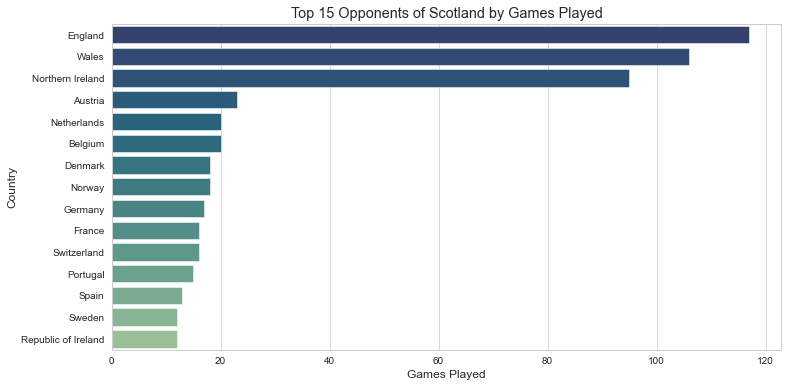

In [26]:
# Top 15 opponents of Scotland
top_15_opp = overall_opp_df.head(15)

# setting the gird style
sns.set_style('whitegrid')

# plotting the graph
plt.figure(figsize=(12,6))
plt.xticks(rotation=0)
plt.title("Top 15 Opponents of Scotland by Games Played")

sns.barplot(x='Games Played', y='Country',
            palette='crest_r',
            data=top_15_opp);

In [27]:
# Grouping data by Results i.e., Win, Draw and Loss
tr_grp_scot = scotland_df.groupby('team_result')

scot_win = tr_grp_scot.get_group('Win').copy()
scot_draw = tr_grp_scot.get_group('Draw').copy()
scot_loss = tr_grp_scot.get_group('Loss').copy()

#### 1. Top 15 `winning` opponents for Scotland along with win ratio

#### a. Top 15 countries for Scotland by `Wins`

In [28]:
# Top 15 countries by win for Scotland
win_top_15 = scot_win['opponent'].value_counts().head(15)

# Converting the data from "series" to "frame"
win_top_15_df = win_top_15.to_frame('Games Played')
win_top_15_df.reset_index(level =[None], inplace = True)
win_top_15_df.rename(columns = {'index':'Country'}, inplace = True)

#### b. Top 15 countries for Scotland by `Win Ratio` 

In [29]:
# Calculting win ratio for Scotland against other countries
win_ratio = (win_top_15 / overall_opp * 100).round(2)

# Win Ratio of top 15 countries against Scotland
top_15_win_ratio = win_ratio.sort_values(ascending = False).dropna().head(15)

# Converting the data from "series" to "frame"
top_15_win_ratio_df = top_15_win_ratio.to_frame('Win Ratio')
top_15_win_ratio_df.reset_index(level =[None], inplace = True)
top_15_win_ratio_df.rename(columns = {'index':'Country'}, inplace = True)

#### 2. Top 15 `drawn` opponents for Scotland along with draw ratio

#### a. Top 15 countries for Scotland by `Draws`

In [30]:
# Top 15 countries by draw for Scotland
draw_top_15 = scot_draw['opponent'].value_counts().head(15)

# Converting the data from "series" to "frame"
draw_top_15_df = draw_top_15.to_frame('Games Played')
draw_top_15_df.reset_index(level =[None], inplace = True)
draw_top_15_df.rename(columns = {'index':'Country'}, inplace = True)

#### b. Top 15 countries for Scotland by `Draw Ratio` 

In [31]:
# Calculting draw ratio for Scotland against other countries
draw_ratio = (draw_top_15 / overall_opp * 100).round(2)

# Draw Ratio of top 15 countries against Scotland
top_15_draw_ratio = draw_ratio.sort_values(ascending = False).dropna().head(15)

# Converting the data from "series" to "frame"
top_15_draw_ratio_df = top_15_draw_ratio.to_frame('Draw Ratio')
top_15_draw_ratio_df.reset_index(level =[None], inplace = True)
top_15_draw_ratio_df.rename(columns = {'index':'Country'}, inplace = True)

#### 3. Top 5 losining opponents for Scotland

#### a. Top 15 countries for Scotland by `Loss`

In [32]:
# Top 15 countries by loss for Scotland
loss_top_15 = scot_loss['opponent'].value_counts().head(15)

# Converting the data from "series" to "frame"
loss_top_15_df = loss_top_15.to_frame('Games Played')
loss_top_15_df.reset_index(level =[None], inplace = True)
loss_top_15_df.rename(columns = {'index':'Country'}, inplace = True)

#### b. Top 15 countries for Scotland by `Loss Ratio` 

In [33]:
# Calculting loss ratio for Scotland against other countries
loss_ratio = (loss_top_15 / overall_opp * 100).round(2)

# Loss Ratio of top 15 countries against Scotland
top_15_loss_ratio = loss_ratio.sort_values(ascending = False).dropna().head(15)

# Converting the data from "series" to "frame"
top_15_loss_ratio_df = top_15_loss_ratio.to_frame('Loss Ratio')
top_15_loss_ratio_df.reset_index(level =[None], inplace = True)
top_15_loss_ratio_df.rename(columns = {'index':'Country'}, inplace = True)

#### Plotting all the charts in grids

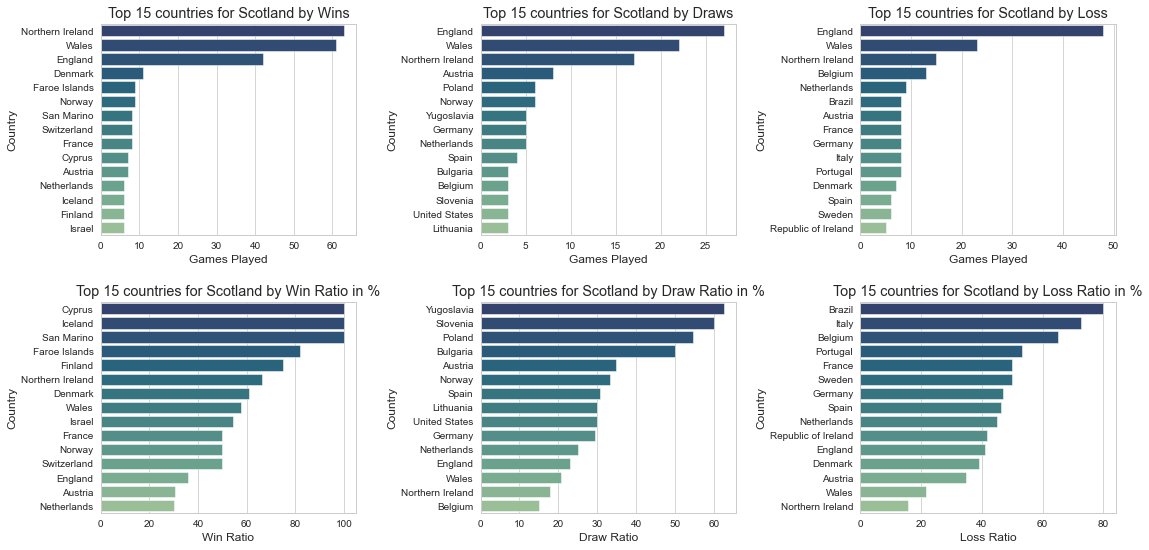

In [34]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# 1. Top 15 countries for Scotland by "Wins"
axes[0,0].set_title("Top 15 countries for Scotland by Wins")
sns.barplot(x='Games Played', y='Country',
            palette="crest_r",
            data=win_top_15_df,
            ax=axes[0,0]);

# 2. Top 15 countries for Scotland by "Draws"
axes[0,1].set_title("Top 15 countries for Scotland by Draws")
sns.barplot(x='Games Played', y='Country',
            palette="crest_r",
            data=draw_top_15_df,
            ax=axes[0,1]);

# 3. Top 15 countries for Scotland by "Loss"
axes[0,2].set_title("Top 15 countries for Scotland by Loss")
sns.barplot(x='Games Played', y='Country',
            palette="crest_r",
            data=loss_top_15_df,
            ax=axes[0,2]);


# 4. Top 15 countries for Scotland by "Win Ratio"
axes[1,0].set_title("Top 15 countries for Scotland by Win Ratio in %")
sns.barplot(x='Win Ratio', y='Country',
            palette="crest_r",
            data=top_15_win_ratio_df,
            ax=axes[1,0]);

# 5. Top 15 countries for Scotland by "Draw Ratio"
axes[1,1].set_title("Top 15 countries for Scotland by Draw Ratio in %")
sns.barplot(x='Draw Ratio', y='Country',
            palette="crest_r",
            data=top_15_draw_ratio_df,
            ax=axes[1,1]);

# 6. Top 15 countries for Scotland by "Loss Ratio"
axes[1,2].set_title("Top 15 countries for Scotland by Loss Ratio in %")
sns.barplot(x='Loss Ratio', y='Country',
            palette="crest_r",
            data=top_15_loss_ratio_df,
            ax=axes[1,2]);

plt.tight_layout(pad=2);

In [35]:
# Checking the total number of games Scotland has played against a country
overall_opp['Iceland']

6

**INSIGHTS** – 

**Win** – Looking at the `Win Counts` graph we can see the win count is high in UK nations while it’s low in other nations. Now, this doesn’t imply that Scotland does better against its fellow UK nations. If we look at the `Win Ratio` graph, we see Scotland has done well against nations like Cyprus, Iceland and San Marino etc. But we do have to keep in mind that Scotland has played very few games against these nations (i.e.,<20). While the Scots has registered a greater number of wins against England as well, but the win ratio against them is below 40%. Hence we do not consider that Scotland has a good winning record against England

>**Considering all the above points in mind, we can conclude that Scotland has a decent winning record against Northern Ireland and Wales as it has a win ratio of more than 50% against these nations.**


**Draw** – We see the same pattern in Draw Counts just like in Win counts. Scotland has registered more Draws against the UK nations compared to other nations, as it has played more number of matches against these nations. But again, when we look at the Draw Ratio it paints a different picture. We see the Draw ratio of England, Wales and Northern Ireland is in the ball park of around 15-25%

>**From the above points we can conclude that Scotland has a <25% chance of Drawing its matches against UK nations.**   


**Loss** – Just like in the previous cases Scotland has a high Loss counts against its UK nations. But when we look at the Loss Ratio graph, we see that Scotland has a lower Loss Ratio against Northern Ireland and Wales. Whereas it has a greater loss ratio against England.

>**From the above points we can conclude that Scotland has the worst losing record against England as it has a loss ratio of >40% whereas it has a good loss record against Northern Ireland and Wales which is <25%.** 


___

 ### 5a. Best scoring cities for Scotland  
 ### 5b. Worst scoring cities for Scotland 

**Criteria for Best scoring cities** - Cities where Scotland has scored > 5 goals and their opponents have not scored > 3 goals

**Criteria for Worst scoring cities** - Cities where Scotland has scored < 3 goals and their opponents have scored 4 goals or more  

In [36]:
scotland_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'team_result', 'opponent'],
      dtype='object')

In [37]:
# Let's create 2 new columns called 'team_score' (i.e. Scotland's score) and 'opp_score' (i.e. Scotland's opponent's score)

# team_score
scotland_df.loc[scotland_df['home_team'] == 'Scotland', 'team_score'] = scotland_df['home_score']
scotland_df.loc[scotland_df['away_team'] == 'Scotland', 'team_score'] = scotland_df['away_score']

scotland_df['team_score'] = scotland_df['team_score'].astype(int)

# opp_score
scotland_df.loc[scotland_df['home_team'] != 'Scotland', 'opp_score'] = scotland_df['home_score']
scotland_df.loc[scotland_df['away_team'] != 'Scotland', 'opp_score'] = scotland_df['away_score']

scotland_df['opp_score'] = scotland_df['opp_score'].astype(int)

### 5a. Best scoring cities for Scotland

In [38]:
""" 
For best scoring cities we consider those cities in which Scotland has scored the most goals and the opposite team has not 
scored > 3 goals
""" 

# Sorting the df by team_score (desc.) and opp_score (asc.)
best_score_sort = scotland_df.sort_values(by = ['team_score','opp_score'], 
                                     ascending = [False,True])

# Filtering team_score by > 5 goals 
best_score = best_score_sort.loc[best_score_sort['team_score'] >5]

### 5b. Worst scoring cities for Scotland 

In [39]:
"""
For Worst Scoring Cities we consider those cities in which scotland has scored < 3 goals and has lost to its opponent 
by a huge margin
"""

# Sorting opp_score (desc.) and team_score (asc.)
worst_score_sort = scotland_df.sort_values(by = ['opp_score', 'team_score'],
                                           ascending = [False, True])

# Filtering team_score by < 3 goals and opp_score by > 4 goals 
worst_score = (worst_score_sort.loc[(worst_score_sort['team_score'] < 3) & (worst_score_sort['opp_score'] > 3)])

#### Plotting both the charts in grids

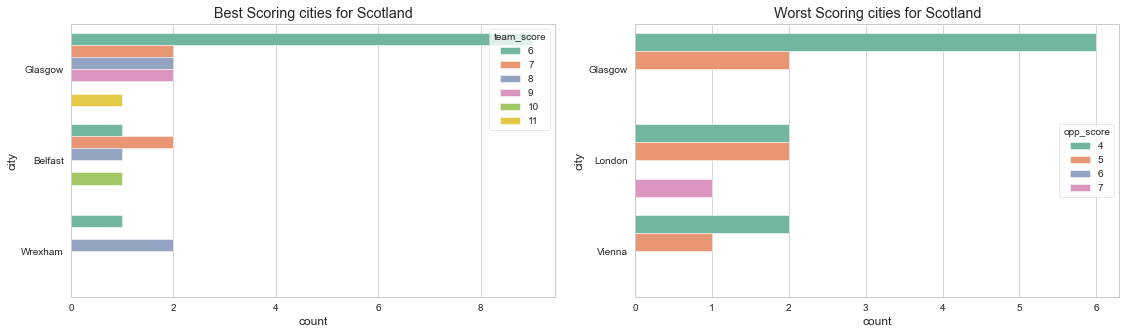

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# 1. Best Scoring cities for Scotland
axes[0].set_title("Best Scoring cities for Scotland")
sns.set_style('whitegrid')
sns.countplot(y='city',
              hue='team_score',
              palette="Set2",
              order=['Glasgow','Belfast','Wrexham'],
              data=best_score,
              ax=axes[0]);


#2. Worst Scoring cities for Scotland
axes[1].set_title("Worst Scoring cities for Scotland")
sns.set_style('whitegrid')
sns.countplot(y='city',
              hue='opp_score',
              palette="Set2",
              order=['Glasgow','London','Vienna'],
              data=worst_score,
              ax=axes[1]);

plt.tight_layout(pad=2);


**INSIGHTS** - 

From the above graph, we can conclude that `Glasgow, Belfast and Wrexham` are the best scoring cities for Scotland as they have repeated huge score lines on multiple occasions with our given criteria for best scoring cities. Similarly, we can say that `Glasgow, London and Vienna` are the worst scoring cities for Scotland as they have been beaten by huge score lines and simultaneously scored very few goals on multiple occasions in these cities given our criteria for worst scoring cities.

>It is interesting to know that Glasgow is both the best and worst scoring city for Scotland considering that it is a city under Scotland.

___